<a href="https://colab.research.google.com/github/Mahendran180923/News_Senticonomy/blob/main/Senticonomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Senticonomy

# **import dataset from kaggle**

In [ ]:
!pip install kaggle -q

In [ ]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
# Dowload newyork times news dataset from Kaggle
!curl -L -o nyt-articles-21m-2000-present.zip https://www.kaggle.com/api/v1/datasets/download/aryansingh0909/nyt-articles-21m-2000-present


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  875M  100  875M    0     0  79.0M      0  0:00:11  0:00:11 --:--:-- 65.7M


In [ ]:
# Unzip the downloaded file
!unzip -q nyt-articles-21m-2000-present.zip

In [ ]:
#Read CSV file using pandas library
import pandas as pd


data = pd.read_csv('/content/nyt-metadata.csv')
print(data.head())

<ipython-input-17-74dd5e42f531>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/nyt-metadata.csv')


                                            abstract  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3  WILL the forces of globalism continue to push ...   
4   SPECIAL TODAY  The Millennium  Envisioning th...   

                                             web_url  \
0  https://www.nytimes.com/2000/01/01/sports/pro-...   
1  https://www.nytimes.com/2000/01/01/opinion/l-o...   
2  https://www.nytimes.com/2000/01/01/us/1-1-00-t...   
3  https://www.nytimes.com/2000/01/01/news/vision...   
4  https://www.nytimes.com/2000/01/01/nyregion/in...   

                                             snippet  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3                                                NaN   
4                                             

In [ ]:
import os

file_size = os.path.getsize('nyt-metadata.csv')

if file_size < 1024:
    print(f"The size of the CSV file is: {file_size} bytes")
elif file_size < 1024 ** 2:
    print(f"The size of the CSV file is: {file_size / 1024:.2f} KB")
else:
    print(f"The size of the CSV file is: {file_size / (1024 ** 2):.2f} MB")

The size of the CSV file is: 4426.63 MB


# Data handling -> remove null values and drop unwanted columns

In [ ]:
data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name'],
      dtype='object')

In [ ]:
data.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,Article on upcoming New York Giants-Dallas Cow...,https://www.nytimes.com/2000/01/01/sports/pro-...,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,D,2.0,The New York Times,[],"{'main': 'Playoffs or No, Dallas Provides The ...","[{'name': 'organizations', 'value': 'New York ...",2000-01-01 05:00:00+00:00,article,Sports Desk,Sports,"{'original': 'By Bill Pennington', 'person': [...",News,nyt://article/01111a48-3502-5021-8096-bc929379...,819.0,nyt://article/01111a48-3502-5021-8096-bc929379...,NaN
1,Jeanne C Pond letter expresses hope that spiri...,https://www.nytimes.com/2000/01/01/opinion/l-o...,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,A,30.0,The New York Times,[],"{'main': 'On This First Day, a Fanfare for the...","[{'name': 'persons', 'value': 'Pond, Jeanne C'...",2000-01-01 05:00:00+00:00,article,Editorial Desk,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,122.0,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,NaN
2,Many experts on Y2K computer problem report th...,https://www.nytimes.com/2000/01/01/us/1-1-00-t...,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,A,10.0,The New York Times,[],"{'main': ""Internet's Cheering Squad Nervously ...","[{'name': 'subject', 'value': 'Electronic Mail...",2000-01-01 05:00:00+00:00,article,National Desk,U.S.,"{'original': 'By Barnaby J. Feder', 'person': ...",News,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,761.0,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,NaN
3,WILL the forces of globalism continue to push ...,https://www.nytimes.com/2000/01/01/news/vision...,NaN,WILL the forces of globalism continue to push ...,E,4.0,The New York Times,[],{'main': 'Economic Thinking Finds a Free Marke...,[],2000-01-01 05:00:00+00:00,article,The Millennium,Archives,"{'original': 'By Floyd Norris', 'person': [{'f...",News,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,916.0,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,NaN
4,SPECIAL TODAY The Millennium Envisioning th...,https://www.nytimes.com/2000/01/01/nyregion/in...,NaN,SPECIAL TODAY,A,1.0,The New York Times,[],"{'main': 'INSIDE', 'kicker': None, 'content_ki...",[],2000-01-01 05:00:00+00:00,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Summary,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,102.0,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,NaN


In [ ]:
print(data['news_desk'].unique())

['Sports Desk' 'Editorial Desk' 'National Desk' 'The Millennium'
 'Metropolitan Desk' 'Classified' 'Business/Financial Desk'
 'The Arts/Cultural Desk' 'Foreign Desk' nan 'The Millenium' 'Travel Desk'
 'New Jersey Weekly Desk' 'Book Review Desk'
 'Money and Business/Financial Desk' 'The City Weekly Desk'
 'Long Island Weekly Desk' 'Style Desk' 'Westchester Weekly Desk'
 'Real Estate Desk' 'Magazine Desk' 'Connecticut Weekly Desk'
 'Week in Review Desk' 'Arts and Leisure Desk' 'Society Desk'
 'Leisure/Weekend Desk' 'Television' 'Automobiles' 'Style'
 'Health & Fitness' 'Science Desk' 'News' 'Workplace'
 'Dining In, Dining Out/Style Desk' 'Dining In, Dining Out'
 'House & Home/Style Desk' 'Circuits'
 'Movies, Performing Arts/Weekend Desk' 'Automobile'
 'Arts & Ideas/Cultural Desk' 'Education Life Supplement'
 'Money & Business/Financial Desk' 'Dining & Wine'
 'Sports DeskSports Desk' 'Retirement' 'Fashions of The Times Magazine'
 'Sophisticated Traveler Magazine' 'Books' 'Health Desk' 'Ge

In [ ]:
data.isnull().sum()

,0
abstract,31917
web_url,1
snippet,196167
lead_paragraph,41988
print_section,746603
print_page,747851
source,1
multimedia,1
headline,1
keywords,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191681 entries, 0 to 2191680
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   abstract          object 
 1   web_url           object 
 2   snippet           object 
 3   lead_paragraph    object 
 4   print_section     object 
 5   print_page        object 
 6   source            object 
 7   multimedia        object 
 8   headline          object 
 9   keywords          object 
 10  pub_date          object 
 11  document_type     object 
 12  news_desk         object 
 13  section_name      object 
 14  byline            object 
 15  type_of_material  object 
 16  _id               object 
 17  word_count        float64
 18  uri               object 
 19  subsection_name   object 
dtypes: float64(1), object(19)
memory usage: 334.4+ MB


In [ ]:
# Copy the data in different variable for future reference
df = pd.DataFrame(data)

In [ ]:
# Drop unwatned columns

df.drop(['print_section', 'snippet', 'print_page', 'source', 'document_type', 'byline', 'keywords',  'news_desk', 'type_of_material',  '_id', 'word_count', 'uri', 'multimedia', 'subsection_name'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,41988
headline,1
pub_date,1
section_name,2010


In [ ]:
# drop the row where date is having null values
df.dropna(subset=['pub_date'], inplace=True)

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,41987
headline,0
pub_date,0
section_name,2009


In [ ]:
import numpy as np
df['lead_paragraph'] = np.where(df['lead_paragraph'].isnull(),
                                   df['abstract'] ,
                                   df['lead_paragraph'])

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,31916
headline,0
pub_date,0
section_name,2009


In [ ]:
# Drop rows if its having a null values
df.dropna(how='any', inplace=True)
df.isnull().sum()

,0
abstract,0
web_url,0
lead_paragraph,0
headline,0
pub_date,0
section_name,0


# Kept data from 2015 to 04-04-2025

In [ ]:
# Download required package for filtering the data
!pip install python-dateutil pytz

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pytz

# Convert the date into datetime format from object
df['pub_date'] = pd.to_datetime(df['pub_date'])

# Calculate the date 10 years ago
ten_years_ago = (datetime.now(pytz.UTC) - relativedelta(years=10))

# Filter the DataFrame to include only rows with pub_date within the last 10 years
df_filtered = df[df['pub_date'] >= ten_years_ago]

# Print the first few rows of the filtered DataFrame
print(df_filtered.head())

                                                  abstract  \
1704856  I thought the remnants of my eating disorder h...   
1704857  The Times first profiled Wesley Bell in 2015, ...   
1704858  Highlights from the International Herald Tribu...   
1704859  The blast was the latest in a long series of a...   
1704860  Media dig in on California’s profligate water ...   

                                                   web_url  \
1704856  https://parenting.blogs.nytimes.com/2015/04/05...   
1704857  https://www.nytimes.com/video/us/1000000036083...   
1704858  https://iht-retrospective.blogs.nytimes.com/20...   
1704859  https://www.nytimes.com/2015/04/06/world/middl...   
1704860  https://dotearth.blogs.nytimes.com/2015/04/05/...   

                                            lead_paragraph  \
1704856    “Mom, when do grown-ups stop eating breakfast?”   
1704857  The Times first profiled Wesley Bell in 2015, ...   
1704858   A 1944 report follows the life of a British f...   
170485

In [ ]:
df_filtered.isnull().sum()

,0
abstract,0
web_url,0
lead_paragraph,0
headline,0
pub_date,0
section_name,0


# Save dataframe as CSV file

In [ ]:
df_filtered.to_csv('news_data.csv')

# Push CSV file to AWS S3 Bucket

In [ ]:
import os

file_size = os.path.getsize('news_data.csv')

if file_size < 1024:
    print(f"The size of the CSV file is: {file_size} bytes")
elif file_size < 1024 ** 2:
    print(f"The size of the CSV file is: {file_size / 1024:.2f} KB")
else:
    print(f"The size of the CSV file is: {file_size / (1024 ** 2):.2f} MB")

The size of the CSV file is: 325.59 MB


In [ ]:
df_filtered

,abstract,web_url,lead_paragraph,headline,pub_date,section_name
1704856,I thought the remnants of my eating disorder h...,https://parenting.blogs.nytimes.com/2015/04/05...,"“Mom, when do grown-ups stop eating breakfast?”","{'main': '‘Mom, When Do Grown-Ups Stop Eating ...",2015-04-05 12:44:45+00:00,U.S.
1704857,"The Times first profiled Wesley Bell in 2015, ...",https://www.nytimes.com/video/us/1000000036083...,"The Times first profiled Wesley Bell in 2015, ...",{'main': 'From 2015: Why Wesley Bell Entered P...,2015-04-05 13:18:44+00:00,U.S.
1704858,Highlights from the International Herald Tribu...,https://iht-retrospective.blogs.nytimes.com/20...,A 1944 report follows the life of a British f...,{'main': '1940: Kitchen Thrift Urged in Britai...,2015-04-05 13:51:30+00:00,World
1704859,The blast was the latest in a long series of a...,https://www.nytimes.com/2015/04/06/world/middl...,CAIRO — A bomb killed a police officer and wou...,{'main': 'Bomb Kills Police Officer and Injure...,2015-04-05 14:35:58+00:00,World
1704860,Media dig in on California’s profligate water ...,https://dotearth.blogs.nytimes.com/2015/04/05/...,You don’t know you’re in a megadrought until ...,{'main': 'California’s Wasteful Water Habits R...,2015-04-05 15:03:07+00:00,Opinion
...,...,...,...,...,...,...
2191676,"The National Endowment for the Humanities, whi...",https://www.nytimes.com/2025/04/01/arts/trump-...,Leaders at the National Endowment for the Huma...,{'main': 'DOGE Demands Deep Cuts at Humanities...,2025-04-01 23:00:05+00:00,Arts
2191677,"In an unorthodox move, Ed Martin, the interim ...",https://www.nytimes.com/2025/04/01/us/politics...,"Ed Martin, the ardent Trump loyalist serving a...",{'main': 'Trump-Allied Prosecutor Looks to Und...,2025-04-01 23:20:33+00:00,U.S.
2191678,Although the Trump Organization sold a golf co...,https://www.nytimes.com/2025/04/01/nyregion/tr...,When the Trump Organization sold its interest ...,{'main': 'If New York Puts a Casino in the Bro...,2025-04-01 23:26:31+00:00,New York
2191679,"Randy Fine, a state senator, won a special ele...",https://www.nytimes.com/2025/04/01/us/politics...,"Randy Fine, a Republican state senator in Flor...","{'main': 'Randy Fine, a State Senator, Wins a ...",2025-04-01 23:41:46+00:00,U.S.


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485099 entries, 1704856 to 2191680
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   abstract        485099 non-null  object             
 1   web_url         485099 non-null  object             
 2   lead_paragraph  485099 non-null  object             
 3   headline        485099 non-null  object             
 4   pub_date        485099 non-null  datetime64[ns, UTC]
 5   section_name    485099 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 25.9+ MB


In [ ]:
df = pd.read_csv('/content/news_data.csv')
df

,Unnamed: 0,abstract,web_url,lead_paragraph,headline,pub_date,section_name
0,1704856,I thought the remnants of my eating disorder h...,https://parenting.blogs.nytimes.com/2015/04/05...,"“Mom, when do grown-ups stop eating breakfast?”","{'main': '‘Mom, When Do Grown-Ups Stop Eating ...",2015-04-05 12:44:45+00:00,U.S.
1,1704857,"The Times first profiled Wesley Bell in 2015, ...",https://www.nytimes.com/video/us/1000000036083...,"The Times first profiled Wesley Bell in 2015, ...",{'main': 'From 2015: Why Wesley Bell Entered P...,2015-04-05 13:18:44+00:00,U.S.
2,1704858,Highlights from the International Herald Tribu...,https://iht-retrospective.blogs.nytimes.com/20...,A 1944 report follows the life of a British f...,{'main': '1940: Kitchen Thrift Urged in Britai...,2015-04-05 13:51:30+00:00,World
3,1704859,The blast was the latest in a long series of a...,https://www.nytimes.com/2015/04/06/world/middl...,CAIRO — A bomb killed a police officer and wou...,{'main': 'Bomb Kills Police Officer and Injure...,2015-04-05 14:35:58+00:00,World
4,1704860,Media dig in on California’s profligate water ...,https://dotearth.blogs.nytimes.com/2015/04/05/...,You don’t know you’re in a megadrought until ...,{'main': 'California’s Wasteful Water Habits R...,2015-04-05 15:03:07+00:00,Opinion
...,...,...,...,...,...,...,...
485094,2191676,"The National Endowment for the Humanities, whi...",https://www.nytimes.com/2025/04/01/arts/trump-...,Leaders at the National Endowment for the Huma...,{'main': 'DOGE Demands Deep Cuts at Humanities...,2025-04-01 23:00:05+00:00,Arts
485095,2191677,"In an unorthodox move, Ed Martin, the interim ...",https://www.nytimes.com/2025/04/01/us/politics...,"Ed Martin, the ardent Trump loyalist serving a...",{'main': 'Trump-Allied Prosecutor Looks to Und...,2025-04-01 23:20:33+00:00,U.S.
485096,2191678,Although the Trump Organization sold a golf co...,https://www.nytimes.com/2025/04/01/nyregion/tr...,When the Trump Organization sold its interest ...,{'main': 'If New York Puts a Casino in the Bro...,2025-04-01 23:26:31+00:00,New York
485097,2191679,"Randy Fine, a state senator, won a special ele...",https://www.nytimes.com/2025/04/01/us/politics...,"Randy Fine, a Republican state senator in Flor...","{'main': 'Randy Fine, a State Senator, Wins a ...",2025-04-01 23:41:46+00:00,U.S.


In [18]:
# Download required packages for store the csv file in AWS S3 Bucket
!pip install boto3 -q

In [19]:
# Security Credentials
from google.colab import userdata


access_key = userdata.get('aws_access_key')
secret_key = userdata.get('aws_secret_key')

In [20]:
# Connect with AWS S3 Client
import boto3

s3_client = boto3.client(
    's3',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key
    )

In [ ]:
s3_file = s3_client.list_objects(Bucket='senticonomy')
s3_file

{'ResponseMetadata': {'RequestId': 'AWC7JM0YHV8RH7JV',
  'HostId': 'K2Npou1bL2GOKkriUyxx6F7PToBvmKGvSz5OzI+yEV6zsUjleU/KMq5Spt+ho38OklfAOogOW4I=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'K2Npou1bL2GOKkriUyxx6F7PToBvmKGvSz5OzI+yEV6zsUjleU/KMq5Spt+ho38OklfAOogOW4I=',
   'x-amz-request-id': 'AWC7JM0YHV8RH7JV',
   'date': 'Sat, 05 Apr 2025 11:11:33 GMT',
   'x-amz-bucket-region': 'ap-south-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'IsTruncated': False,
 'Marker': '',
 'Name': 'senticonomy',
 'Prefix': '',
 'MaxKeys': 1000,
 'EncodingType': 'url'}

In [ ]:
# upload the csv file to S3 Bucket and then comment the code to avoid duplication of upload
file = "/content/news_data.csv"

# s3_client.upload_file(file, 'senticonomy', 'news_data.csv') #(File path, Bucket Name, Uploading File Name)

# Download the news_data csv file from S3 Bucket for preprocessing

In [21]:
s3_client.download_file('senticonomy', 'news_data.csv', '/content/s3_news_data.csv')  #(Bucket name, File Name, Downloading Path)

# Data Handling / Cleaning

In [22]:
import pandas as pd
import ast
import numpy as np

# Read csv file and store as Dataframe
uncleaned_data = pd.read_csv('/content/s3_news_data.csv')
df = pd.DataFrame(uncleaned_data)

df

,Unnamed: 0,abstract,web_url,lead_paragraph,headline,pub_date,section_name
0,1704856,I thought the remnants of my eating disorder had escaped my daughter’s notice. I was wrong.,https://parenting.blogs.nytimes.com/2015/04/05/mom-when-do-grown-ups-stop-eating-breakfast/,"“Mom, when do grown-ups stop eating breakfast?”","{'main': '‘Mom, When Do Grown-Ups Stop Eating Breakfast?’', 'kicker': 'Motherlode', 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}",2015-04-05 12:44:45+00:00,U.S.
1,1704857,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.",https://www.nytimes.com/video/us/100000003608386/an-election-in-ferguson.html,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.","{'main': 'From 2015: Why Wesley Bell Entered Politics', 'kicker': 'U.S.', 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}",2015-04-05 13:18:44+00:00,U.S.
2,1704858,Highlights from the International Herald Tribune archives: The British government urges housewives to be thrifty in 1940.,https://iht-retrospective.blogs.nytimes.com/2015/04/05/1940-kitchen-thrift-urged-in-britain-educational-drive-to-show-way/,A 1944 report follows the life of a British family as they struggle with the rationing system.Imperial War Museums,"{'main': '1940: Kitchen Thrift Urged in Britain, Educational Drive to Show Way', 'kicker': 'IHT Retrospective', 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}",2015-04-05 13:51:30+00:00,World
3,1704859,"The blast was the latest in a long series of attacks aimed at security forces or business interests, but it appeared to be the first to hit one of the most secure parts of the capital.",https://www.nytimes.com/2015/04/06/world/middleeast/egypt-cairo-bombing.html,"CAIRO — A bomb killed a police officer and wounded two civilians at a police booth on a main bridge over an affluent island in the Nile on Sunday, raising new fears that militants were targeting even the most secure parts of Egypt’s capital.","{'main': 'Bomb Kills Police Officer and Injures Civilians in Cairo', 'kicker': None, 'content_kicker': None, 'print_headline': 'Elite Part of Cairo Is Bombed', 'name': None, 'seo': None, 'sub': None}",2015-04-05 14:35:58+00:00,World
4,1704860,Media dig in on California’s profligate water habits.,https://dotearth.blogs.nytimes.com/2015/04/05/californias-wasteful-water-habits-run-up-against-a-dry-future-and-past/,"You don’t know you’re in a megadrought until you’re many years, if not decades, into one. So conditions in California could still turn around (which could lead to a “shock to trance” effect on water conservation efforts).","{'main': 'California’s Wasteful Water Habits Run Up Against a Dry Future – and Past', 'kicker': 'Dot Earth', 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}",2015-04-05 15:03:07+00:00,Opinion
...,...,...,...,...,...,...,...
485094,2191676,"The National Endowment for the Humanities, which supports museums, scholarship and historical sites, could see grants curtailed and staffing slashed by up to 80 percent.",https://www.nytimes.com/2025/04/01/arts/trump-doge-federal-cuts-humanities.html,"Leaders at the National Endowment for the Humanities have informed employees that the Trump administration is demanding deep cuts to staff and programs at the agency, in the latest move against federal agencies that support scholarship and culture.","{'main': 'DOGE Demands Deep Cuts at Humanities Endowment', 'kicker': None, 'content_kicker': None, 'print_headline': '', 'name': None, 'seo': None, 'sub': None}",2025-04-01 23:00:05+00:00,Arts
485095,2191677,"In an unorthodox move, Ed Martin, the interim U.S. attorney in Washington, is questioning former President Joseph R. Biden Jr.’s family and fo

In [23]:
# Drop the column name "Unnamed"

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485099 entries, 0 to 485098
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   abstract        485099 non-null  object
 1   web_url         485099 non-null  object
 2   lead_paragraph  485099 non-null  object
 3   headline        485099 non-null  object
 4   pub_date        485099 non-null  object
 5   section_name    485099 non-null  object
dtypes: object(6)
memory usage: 22.2+ MB


In [24]:
# convert the date into datetime format
df['pub_date'] = pd.to_datetime(df['pub_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485099 entries, 0 to 485098
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   abstract        485099 non-null  object             
 1   web_url         485099 non-null  object             
 2   lead_paragraph  485099 non-null  object             
 3   headline        485099 non-null  object             
 4   pub_date        485099 non-null  datetime64[ns, UTC]
 5   section_name    485099 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 22.2+ MB


In [25]:
# Extract day, month, year and time from 'pub_date' column for better analysis

df['year'] = df['pub_date'].dt.year
df['month'] = df['pub_date'].dt.month
df['day'] = df['pub_date'].dt.day
df['day_of_week'] = df['pub_date'].dt.day_name()
df['time'] = df['pub_date'].dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485099 entries, 0 to 485098
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   abstract        485099 non-null  object             
 1   web_url         485099 non-null  object             
 2   lead_paragraph  485099 non-null  object             
 3   headline        485099 non-null  object             
 4   pub_date        485099 non-null  datetime64[ns, UTC]
 5   section_name    485099 non-null  object             
 6   year            485099 non-null  int32              
 7   month           485099 non-null  int32              
 8   day             485099 non-null  int32              
 9   day_of_week     485099 non-null  object             
 10  time            485099 non-null  object             
dtypes: datetime64[ns, UTC](1), int32(3), object(7)
memory usage: 35.2+ MB


In [26]:
import ast
# Extract main Headline from headline column which has dictionary type of data

df['headline'] = df['headline'].apply(lambda x: ast.literal_eval(x)['main'])

df['headline']

,headline
0,"‘Mom, When Do Grown-Ups Stop Eating Breakfast?’"
1,From 2015: Why Wesley Bell Entered Politics
2,"1940: Kitchen Thrift Urged in Britain, Educational Drive to Show Way"
3,Bomb Kills Police Officer and Injures Civilians in Cairo
4,California’s Wasteful Water Habits Run Up Against a Dry Future – and Past
...,...
485094,DOGE Demands Deep Cuts at Humanities Endowment
485095,Trump-Allied Prosecutor Looks to Undermine Biden Pardons
485096,"If New York Puts a Casino in the Bronx, Trump Will Get $115 Million"
485097,"Randy Fine, a State Senator, Wins a House Seat in Florida, Adding to the G.O.P. Majority."


In [27]:
# Fill the lead_paragraph column with abstract column info where lead_paragraph column has only the info of "To the Editor:" (Seen in many rows)
df['lead_paragraph'] = np.where(df['lead_paragraph'] == 'To the Editor:',
                                   df['abstract'] ,
                                   df['lead_paragraph'])


# Rename the column names for better understanding
df.rename(columns={'lead_paragraph': 'content', 'section_name': 'category'}, inplace=True)


In [28]:
df

,abstract,web_url,content,headline,pub_date,category,year,month,day,day_of_week,time
0,I thought the remnants of my eating disorder had escaped my daughter’s notice. I was wrong.,https://parenting.blogs.nytimes.com/2015/04/05/mom-when-do-grown-ups-stop-eating-breakfast/,"“Mom, when do grown-ups stop eating breakfast?”","‘Mom, When Do Grown-Ups Stop Eating Breakfast?’",2015-04-05 12:44:45+00:00,U.S.,2015,4,5,Sunday,12:44:45
1,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.",https://www.nytimes.com/video/us/100000003608386/an-election-in-ferguson.html,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.",From 2015: Why Wesley Bell Entered Politics,2015-04-05 13:18:44+00:00,U.S.,2015,4,5,Sunday,13:18:44
2,Highlights from the International Herald Tribune archives: The British government urges housewives to be thrifty in 1940.,https://iht-retrospective.blogs.nytimes.com/2015/04/05/1940-kitchen-thrift-urged-in-britain-educational-drive-to-show-way/,A 1944 report follows the life of a British family as they struggle with the rationing system.Imperial War Museums,"1940: Kitchen Thrift Urged in Britain, Educational Drive to Show Way",2015-04-05 13:51:30+00:00,World,2015,4,5,Sunday,13:51:30
3,"The blast was the latest in a long series of attacks aimed at security forces or business interests, but it appeared to be the first to hit one of the most secure parts of the capital.",https://www.nytimes.com/2015/04/06/world/middleeast/egypt-cairo-bombing.html,"CAIRO — A bomb killed a police officer and wounded two civilians at a police booth on a main bridge over an affluent island in the Nile on Sunday, raising new fears that militants were targeting even the most secure parts of Egypt’s capital.",Bomb Kills Police Officer and Injures Civilians in Cairo,2015-04-05 14:35:58+00:00,World,2015,4,5,Sunday,14:35:58
4,Media dig in on California’s profligate water habits.,https://dotearth.blogs.nytimes.com/2015/04/05/californias-wasteful-water-habits-run-up-against-a-dry-future-and-past/,"You don’t know you’re in a megadrought until you’re many years, if not decades, into one. So conditions in California could still turn around (which could lead to a “shock to trance” effect on water conservation efforts).",California’s Wasteful Water Habits Run Up Against a Dry Future – and Past,2015-04-05 15:03:07+00:00,Opinion,2015,4,5,Sunday,15:03:07
...,...,...,...,...,...,...,...,...,...,...,...
485094,"The National Endowment for the Humanities, which supports museums, scholarship and historical sites, could see grants curtailed and staffing slashed by up to 80 percent.",https://www.nytimes.com/2025/04/01/arts/trump-doge-federal-cuts-humanities.html,"Leaders at the National Endowment for the Humanities have informed employees that the Trump administration is demanding deep cuts to staff and programs at the agency, in the latest move against federal agencies that support scholarship and culture.",DOGE Demands Deep Cuts at Humanities Endowment,2025-04-01 23:00:05+00:00,Arts,2025,4,1,Tuesday,23:00:05
485095,"In an unorthodox move, Ed Martin, the interim U.S. attorney in Washington, is questioning former President Joseph R. Biden Jr.’s family and former White House officials about clemency.",https://www.nytimes.com/2025/04/01/us/politics/trump-prosecutor-biden-pardons.html,"Ed Martin, the ardent Trump loyalist serving as interim U.S. attorney in Washington, is pursuing an inquiry into whether former President Joseph R. Biden Jr. was competent to pardon his family members and others during his final days in office.",Trump-Allied Prosecutor Looks to Undermine Biden Pardons,2025-04-01 23:20:33+00:00,U.S.,2025,4,1,Tuesday,23:20:33
485096,"Although the Trump Organization sold a golf course in Ferry Point Park in the Bronx to Bally’s, it will still receive a windfall if the 

In [29]:
pd.set_option('display.max_colwidth', None)

In [30]:
# Filtering the news category
import numpy as np

unique_categories, counts = np.unique(df['category'], return_counts=True)

for category, count in zip(unique_categories, counts):
    print(f"{category}: {count}")

Admin: 294
Archives: 1
Arts: 38846
At Home: 491
Automobiles: 336
Blogs: 1666
Book Review: 1
Books: 16150
Briefing: 8290
Burst: 62
Business Day: 33844
Climate: 2745
Corrections: 3558
Crosswords & Games: 5317
Education: 1789
Fashion & Style: 14865
Food: 9964
Giving: 25
Guide: 3
Guides: 23
Headway: 26
Health: 5769
Home & Garden: 8
Homepage: 22
International Home: 32
Job Market: 275
Lens: 264
Magazine: 6786
Movies: 12651
Multimedia/Photos: 1887
NYT Now: 1493
Neediest Cases: 186
New York: 25520
Obituaries: 2995
Open: 3
Opinion: 48150
Parenting: 912
Podcasts: 3478
Polls: 1
Public Editor: 116
Reader Center: 919
Real Estate: 9811
Science: 6167
Slideshows: 2
Smarter Living: 957
Special Series: 102
Sports: 28904
Style: 9231
Sunday Review: 238
T Brand: 215
T Magazine: 7691
Technology: 8926
The Learning Network: 6860
The New York Times Presents: 21
The Upshot: 3663
The Weekly: 33
Theater: 6852
Times Insider: 2310
Times Topics: 47
Today’s Paper: 2463
Topics: 3
Travel: 5342
U.S.: 76125
Universal: 15

In [31]:
# Want to filter the data for the following categories
category = ["World", "U.S.", "Travel", "Technology", "Sports", "Science", "Real Estate", "New York", "Health", "Food", "Education", "Business Day"]
df = df[df['category'].isin(category)]

In [32]:
df['category'].unique()

array(['U.S.', 'World', 'New York', 'Technology', 'Business Day',
       'Sports', 'Education', 'Science', 'Health', 'Food', 'Travel',
       'Real Estate'], dtype=object)

In [33]:
# Save the dataframe in CSV format and check the size of the file before push into RDS
import os

df.to_csv('cleaned_news_data.csv')

file_size = os.path.getsize('cleaned_news_data.csv')

if file_size < 1024:
    print(f"The size of the CSV file is: {file_size} bytes")
elif file_size < 1024 ** 2:
    print(f"The size of the CSV file is: {file_size / 1024:.2f} KB")
else:
    print(f"The size of the CSV file is: {file_size / (1024 ** 2):.2f} MB")

The size of the CSV file is: 149.77 MB


In [ ]:
import sqlalchemy

host = ""
port = 5432
username = "postgres"
password = ""
db = "cleanednewsdb"

engine = sqlalchemy.create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db}')
#

# Text Preprocessing

In [52]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import download
from sklearn.cluster import KMeans



download('punkt')
download('wordnet')
download('stopwords')

df = df.copy()

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x = vectorizer.fit_transform(df['content'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
kmeans = KMeans(n_clusters=12, random_state=33, n_init=10)
df['cluster'] = kmeans.fit_predict(x)

In [54]:
df

,abstract,web_url,content,headline,pub_date,category,year,month,day,day_of_week,time,cluster
0,I thought the remnants of my eating disorder had escaped my daughter’s notice. I was wrong.,https://parenting.blogs.nytimes.com/2015/04/05/mom-when-do-grown-ups-stop-eating-breakfast/,"“Mom, when do grown-ups stop eating breakfast?”","‘Mom, When Do Grown-Ups Stop Eating Breakfast?’",2015-04-05 12:44:45+00:00,U.S.,2015,4,5,Sunday,12:44:45,10
1,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.",https://www.nytimes.com/video/us/100000003608386/an-election-in-ferguson.html,"The Times first profiled Wesley Bell in 2015, when he successfully ran for City Council in Ferguson, Mo., in the ward where Michael Brown was killed.",From 2015: Why Wesley Bell Entered Politics,2015-04-05 13:18:44+00:00,U.S.,2015,4,5,Sunday,13:18:44,10
2,Highlights from the International Herald Tribune archives: The British government urges housewives to be thrifty in 1940.,https://iht-retrospective.blogs.nytimes.com/2015/04/05/1940-kitchen-thrift-urged-in-britain-educational-drive-to-show-way/,A 1944 report follows the life of a British family as they struggle with the rationing system.Imperial War Museums,"1940: Kitchen Thrift Urged in Britain, Educational Drive to Show Way",2015-04-05 13:51:30+00:00,World,2015,4,5,Sunday,13:51:30,10
3,"The blast was the latest in a long series of attacks aimed at security forces or business interests, but it appeared to be the first to hit one of the most secure parts of the capital.",https://www.nytimes.com/2015/04/06/world/middleeast/egypt-cairo-bombing.html,"CAIRO — A bomb killed a police officer and wounded two civilians at a police booth on a main bridge over an affluent island in the Nile on Sunday, raising new fears that militants were targeting even the most secure parts of Egypt’s capital.",Bomb Kills Police Officer and Injures Civilians in Cairo,2015-04-05 14:35:58+00:00,World,2015,4,5,Sunday,14:35:58,4
5,"Herbert E. Nass, a longtime customer at the Palm in Manhattan, fears that his caricature, which hangs near his favorite booth, may be painted over or obliterated during a renovation.",https://www.nytimes.com/2015/04/06/nyregion/a-regular-at-the-palm-worries-restaurants-face-lift-could-erase-the-caricatures-on-the-walls.html,"Until he saw the word “face-lift” in the letter, Herbert E. Nass had not thought he would ever need one.",A Regular Worries That the Palm’s Face-Lift Could Cause Wrinkles,2015-04-05 15:35:25+00:00,New York,2015,4,5,Sunday,15:35:25,10
...,...,...,...,...,...,...,...,...,...,...,...,...
485093,The department said it was offering a second wave of buyouts to accommodate employees who may have declined the initial offer because of confusing messages.,https://www.nytimes.com/2025/04/01/us/politics/trump-buyouts-us-transportation-department.html,The U.S. Transportation Department is giving employees a second opportunity to voluntarily resign as part of the Trump administration’s continued efforts to downsize the government work force.,Transportation Dept. Renews Voluntary Buyouts for Work Force,2025-04-01 22:40:11+00:00,U.S.,2025,4,1,Tuesday,22:40:11,6
485095,"In an unorthodox move, Ed Martin, the interim U.S. attorney in Washington, is questioning former President Joseph R. Biden Jr.’s family and former White House officials about clemency.",https://www.nytimes.com/2025/04/01/us/politics/trump-prosecutor-biden-pardons.html,"Ed Martin, the ardent Trump loyalist serving as interim U.S. attorney in Washington, is pursuing an inquiry into whether former President Joseph R. Biden Jr. was competent to pardon his family members and others during his final days in office.",Trump-Allied Prosecutor Looks to Undermine Biden Pardons,2025-04-01 23:20:33+00:00,U.S.,2025,4,1,Tuesday,23:20:33,6
485096,"Although the Trump Organization sold a golf course in Ferry Point Park in the Bronx to Bally’s, it will still receive a 

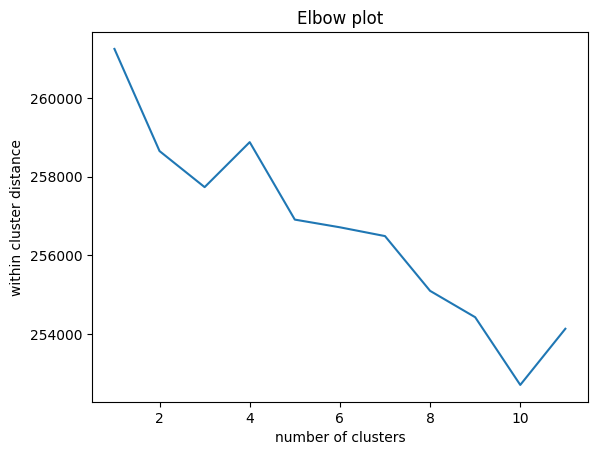

In [55]:
import matplotlib.pyplot as plt
wcss = []

for i in range(1,12):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,12),wcss)
plt.title("Elbow plot")
plt.xlabel("number of clusters")
plt.ylabel("within cluster distance")
plt.show()

In [56]:
kmeans.inertia_

254128.37533565238

In [57]:
wcss

[261244.19143408994,
 258646.6474237545,
 257729.6148211707,
 258874.1023914641,
 256903.87291578404,
 256708.3541764652,
 256484.90731362233,
 255092.43319240614,
 254421.91513668382,
 252700.25149281093,
 254128.37533565238]

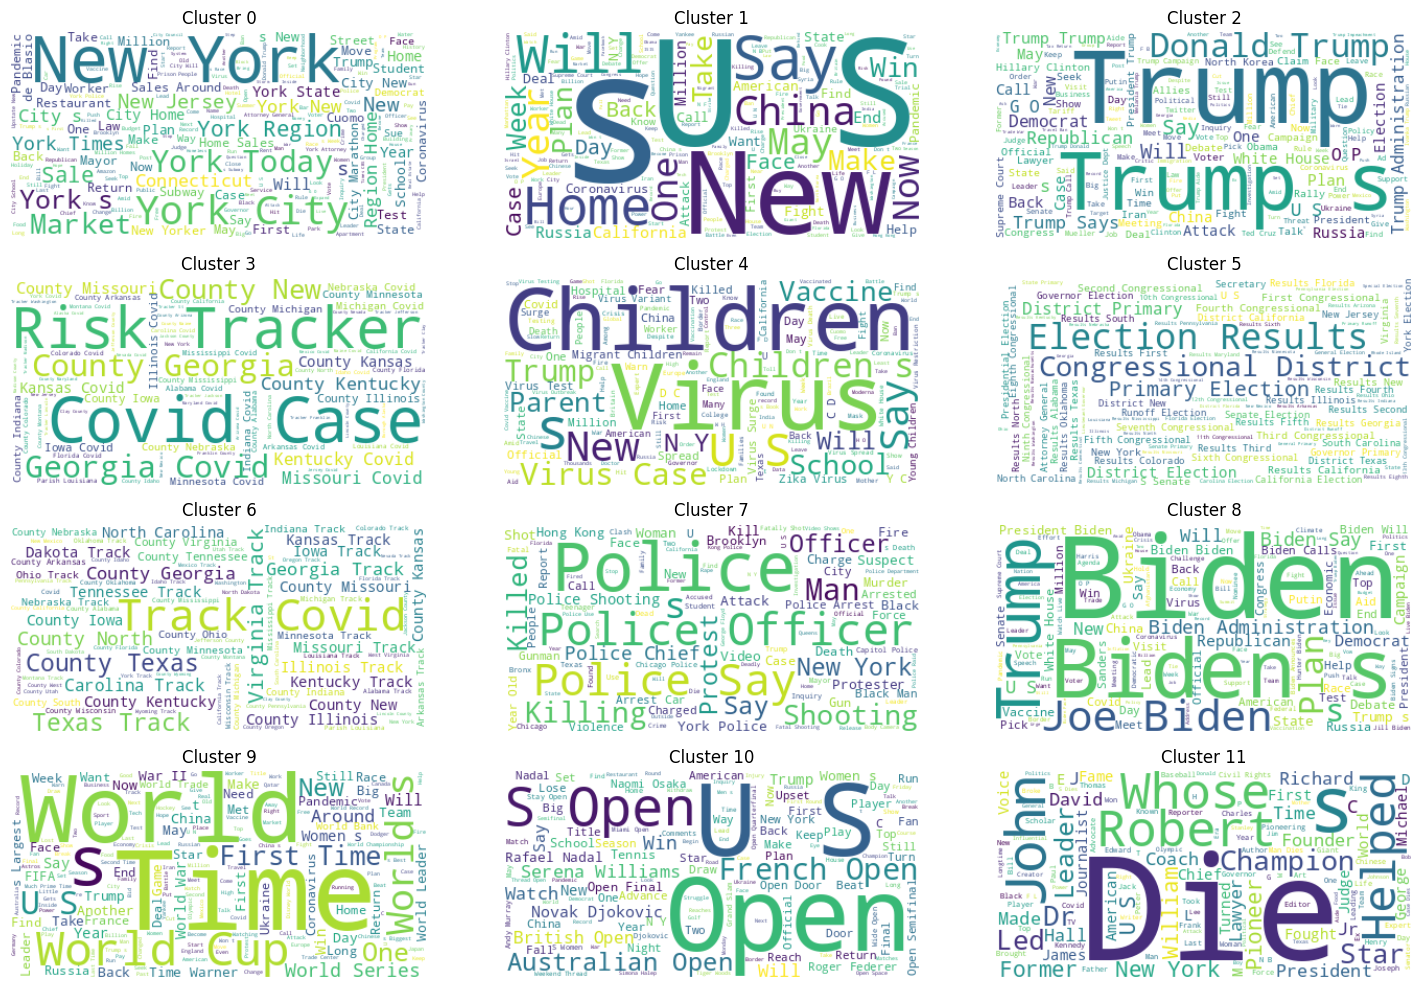

,headline,cluster
0,"‘Mom, When Do Grown-Ups Stop Eating Breakfast?’",1
1,From 2015: Why Wesley Bell Entered Politics,1
2,"1940: Kitchen Thrift Urged in Britain, Educational Drive to Show Way",1
3,Bomb Kills Police Officer and Injures Civilians in Cairo,7
5,A Regular Worries That the Palm’s Face-Lift Could Cause Wrinkles,1
6,Publication of New Internet Rules to Prompt Cheers and Challenges,1
7,1965: Dr. King Joins South African Zulus’ Fight to Stay in U.S.,1
8,"McDonald’s Workers, Vowing a Fight, Say Raises Are Too Little for Too Few",1
11,"Taking Feminist Battle to China’s Streets, and Landing in Jail",1
15,Kenyan Authorities Say Son of Official Was Among Gunmen in University Attack,1


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i in range(0, 12):
  plt.subplot(4, 3, i+1)
  cluster_text = " ".join(df[df['cluster'] == i]['headline'])
  wordcloud = WordCloud(background_color='white').generate(cluster_text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster {i}')


plt.tight_layout()
plt.show()

df[['headline', 'cluster']].head(15)